## import necessary libraries

In [1]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt

## data_loading

In [2]:
housing = pd.read_csv('/home/mhmd/Desktop/project_1/housing.csv')

## data_exploration

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Note:** In this dataset, there are categorical variables (non-numerical data) present. We will address these variables later in the data preprocessing step.


In [4]:
housing.info() 
# as you can see in output we have NULL cells we will fix it later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### X Values

#### housing_median_age:
- The median age for houses in the dataset is 28 years. 
- Additionally, less than 25% of houses have an age of 18 years, which represents the first quartile.
- The dataset also includes values for the second quartile (50%), third quartile (75%), as well as minimum and maximum ages.

#### total_rooms:
- This feature represents the total number of rooms in each house.
- Summary statistics include minimum and maximum values, as well as the first, second, and third quartiles.

#### total_bedrooms:
- Similar to the total_rooms feature, this indicates the total number of bedrooms in each house.
- Summary statistics follow the same pattern as total_rooms.

#### population_households:
- These features are combined for analysis purposes, although they may be separated in future iterations.
- Further details will be discussed regarding their usage in the future.

#### median_income:
- Represents the median income of households in a year.
- Despite its significance, preprocessing is required to address potential issues.

#### ocean_proximity:
- This feature is categorical, necessitating conversion to numerical format for machine learning purposes.
- As evident from the describe() method, ocean_proximity data is not included in the summary statistics.

### y Value

#### median_house_value:
- This feature serves as the target variable for our machine learning model.
- Our objective is to develop a model capable of predicting house prices in California based on the provided X features.


## data_visualizing & play around

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

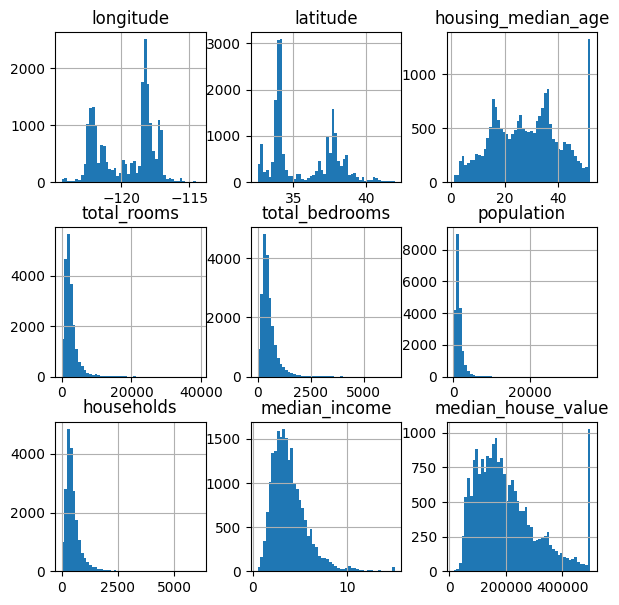

In [6]:
housing.hist(figsize=(7,7),bins=50) #in here we can see that everythhing  is good except 4 features that tend to be on  the left of our histogram.


<Axes: xlabel='longitude', ylabel='latitude'>

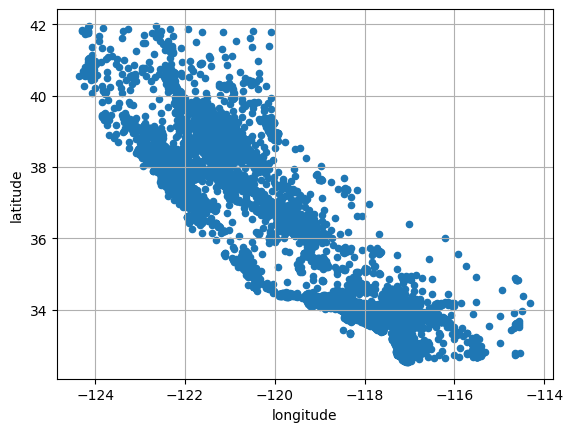

In [7]:
housing.plot(kind='scatter',x='longitude',y='latitude', grid=True) 
# this is a good visualizing but we cant see where do we have more data that are gathered togethere so we will use alpha to make it more useable

<Axes: xlabel='longitude', ylabel='latitude'>

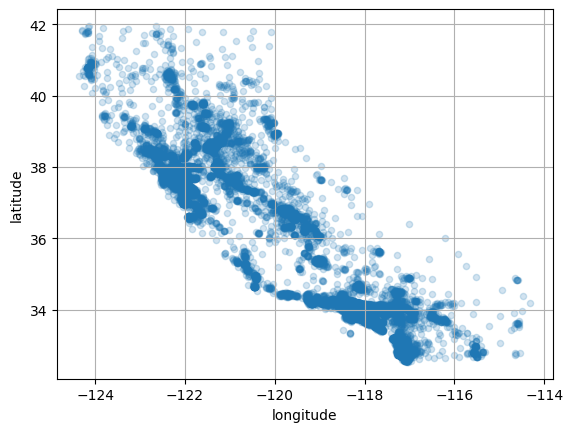

In [8]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,grid=True)
# from here we  can see that  where houses are near and guess the important places

## train_test_split 
there are three ways to split data you can use data shuffeling or crc32 library or for simplicity you can use the sklearn train_test_split method to split you'r data.

### shuffle_split


In [16]:
def shuffle_split(data,test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train_set,test_set = shuffle_split(housing,0.2)

### id_hash_split

In [17]:
from zlib import crc32
def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier)) < test_ratio *2**32
def splt_data_hash(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_Set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_Set],data.loc[in_test_Set]
housing_with_id = housing.reset_index()
train_set,test_set = splt_data_hash(housing_with_id,0.2,'index')